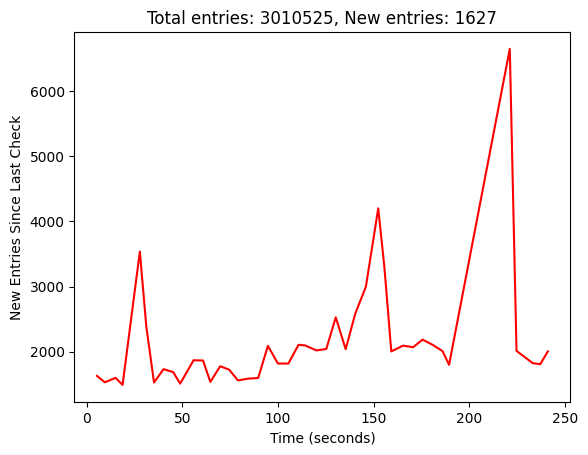

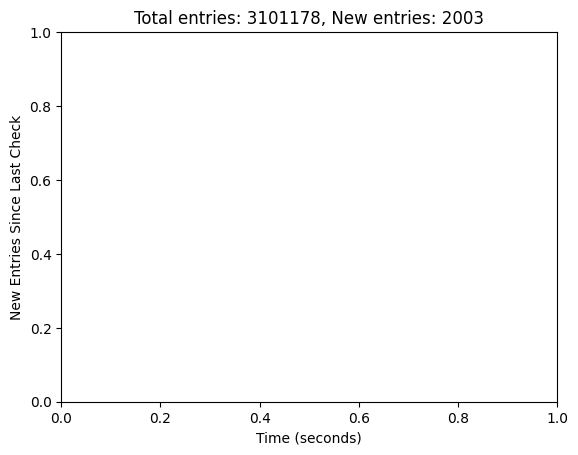

KeyboardInterrupt: 

In [16]:
import snowflake.connector
import os
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Load environment variables
SNOWFLAKE_PASSWORD = os.getenv("SNOWFLAKE_PASSWORD")

# Snowflake connection configuration (same as before)
config = {
    "account": "SFEDU02-KFB85562",
    "user": "BISON",
    "password": SNOWFLAKE_PASSWORD,
    "role": "TRAINING_ROLE",
    "warehouse": "ANIMAL_TASK_WH",
    "database": "CATCH_ME_IF_YOU_CAN",
    "schema": "PUBLIC"
}

# Initialize the plot
plt.ion()
fig, ax = plt.subplots()
x_data, y_data = [], []
line, = ax.plot(x_data, y_data, 'r-')

start_time = time.time()

# Get the initial count and set old_count to it
try:
    # Connect to Snowflake
    conn = snowflake.connector.connect(**config)
    cur = conn.cursor()
    result = cur.execute("SELECT COUNT(*) FROM live_queries;").fetchone()
    old_count = result[0]

    # Close the cursor and connection
    cur.close()
    conn.close()

except Exception as e:
    print(f"Reader Error: {e}")
    old_count = 0  # If there's an error, initialize old_count to 0

# Start the monitoring loop
while True:
    try:
        # Connect to Snowflake
        conn = snowflake.connector.connect(**config)
        cur = conn.cursor()
        result = cur.execute("SELECT COUNT(*) FROM live_queries;").fetchone()
        count = result[0]
        new_entries = count - old_count

        # Only update the plot if new entries have been added since the last check
        if new_entries == 0:
            continue
        # Update plot data
        x_data.append(time.time() - start_time)
        y_data.append(new_entries)
        line.set_xdata(x_data)
        line.set_ydata(y_data)
        ax.relim()
        ax.autoscale_view()
        plt.xlabel('Time (seconds)')
        plt.ylabel('New Entries Since Last Check')
        plt.title(f"Total entries: {count}, New entries: {new_entries}")

        # Redraw the plot
        clear_output(wait=True)
        display(fig)
        plt.pause(0.1)  # Short pause to update the plot
        old_count = count  # Update old_count for the next iteration

        # Close the cursor and connection
        cur.close()
        conn.close()

    except Exception as e:
        print(f"Reader Error: {e}")

    # Wait before the next check
    time.sleep(1)
